# Homework 2: Experiments with kNN and Decision Tree Classifiers

Here we explore a little bit more the performance of the two classifiers of the week. We will do this in the context of a dataset that comes with sklearn, namely https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

1. Load this dataset using sklearn's load_breast_cancer() utility


2. Split the dataset into train and test set, let's set test_size=0.33, random_state=41

3. Apply the kNN Classifier. Make a plot of the accuracy score as a function of the parameter k ranging from 1 to the maximal number of available features, as in lab 3. Which value is best?

4. Apply the StandardScaler to the training data and repeat 3. Any changes? Please comment.

5. Now apply the Decision Tree classifier, random_state=3. There are several (hyper)parameters that control the behavior of the classifier and hence the output. Two important ones are max_depth and max_features. They are set to "None" by default. Compute the accuracy score for all possible combinations of these two parameters ranging from 1 to the maximally meaningful values, and find the combination that gives the highest accuracy score. Visualize the data in a surface or heat map plot, for instance using matplotlib's pcolor function.

6. A nice feature of decision trees is that they are "interpretable", i.e. one can get an understanding of which features are the most important ones in the decision process. For this purpose, you can output the property feature_importances_, which lists the mean impurity decrease due to each feature.

   (a) Make a bar chart of these "feature importances" for the optimized tree classifier from 5., and find the three most important features. What should the physician who needs to diagnose whether the sample is malignant or not primarily look for?

   (b) Use plot_tree as in lab 4 to visualize the decision tree. Can you explain the relationship between the feature importances you plotted in (a) and the tree structure?



In [197]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.tree import plot_tree

plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=18)
plt.rc('figure',figsize=(8,6))

### 1

In [198]:
from sklearn.datasets import load_breast_cancer

dataset=load_breast_cancer()

### 2

In [199]:
X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.33,random_state=41)

### 3

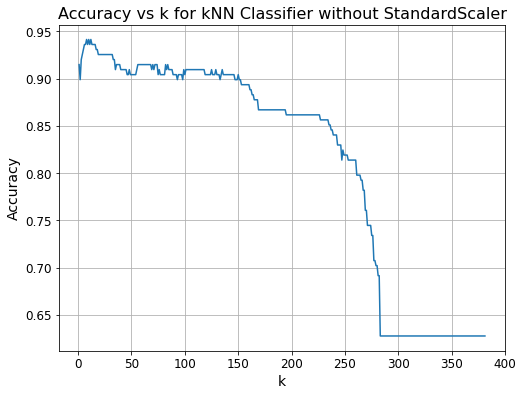

In [200]:
k_vals=np.arange(1,len(X_train)+1)
accuracies=[]
for k in k_vals:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)
plt.plot(k_vals,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for kNN Classifier without StandardScaler')
plt.grid()

In [201]:
accuracy_dict=dict(zip(k_vals,accuracies))
ind=np.argmax(accuracies)
print(f'The k value which produces the highest accuracy of {accuracies[ind]} is k={k_vals[ind]}')

The k value which produces the highest accuracy of 0.9414893617021277 is k=8


### 4

In [202]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
#in lab 4 we scaled both the train and test set, so although not mentioned here, I will do the same again
X_test_scaled=scaler.transform(X_test)

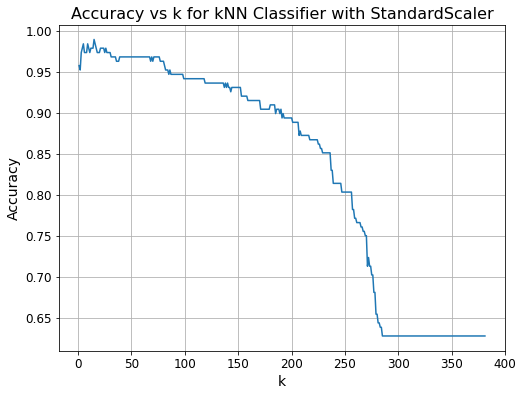

In [203]:
accuracies=[]
for k in k_vals:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)
plt.plot(k_vals,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for kNN Classifier with StandardScaler')
plt.grid()

In [204]:
accuracy_dict=dict(zip(k_vals,accuracies))
ind=np.argmax(accuracies)
print(f'The k value which produces the highest accuracy of {accuracies[ind]} is k={k_vals[ind]}')

The k value which produces the highest accuracy of 0.9893617021276596 is k=15


The accuracy for k values less than 250 is noticeably improved after applying the StandardScaler, this is as expected as the kNN method relies on distances between data points, meaning after scaling you are less subject to outliers.

### 5

In [205]:
model=DecisionTreeClassifier(random_state=3)
model.fit(X_train, y_train)

max_depth_vals=np.arange(1,model.get_depth()+1)
max_features_vals=np.arange(1,30)

accuracies_tree = []
best_accuracy=0
best_depth=0
best_feature=0


for max_depth in max_depth_vals:
    for max_features in max_features_vals:
        model=DecisionTreeClassifier(random_state=3,max_depth=max_depth,max_features=max_features)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        accuracies_tree.append(accuracy)
        
        if accuracy > best_accuracy:
            best_accuracy=accuracy
            best_depth=max_depth
            best_feature=max_features

print('Best maximum depth:',best_depth)
print('Best maximum features:',best_feature)

Best maximum depth: 5
Best maximum features: 26


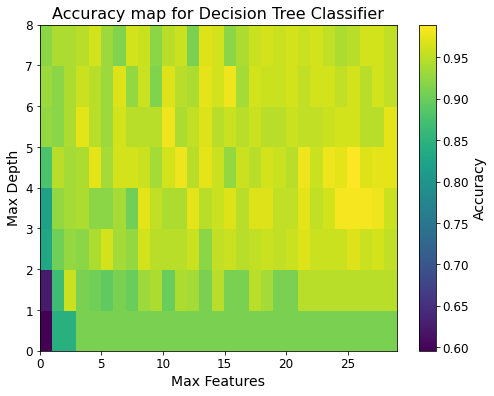

In [206]:
accuracies_tree=np.array(accuracies_tree).reshape(len(max_depth_vals),len(max_features_vals))

plt.pcolor(accuracies_tree)
plt.colorbar(label='Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Max Depth')
plt.title('Accuracy map for Decision Tree Classifier')
plt.show()

### 6

### (a)

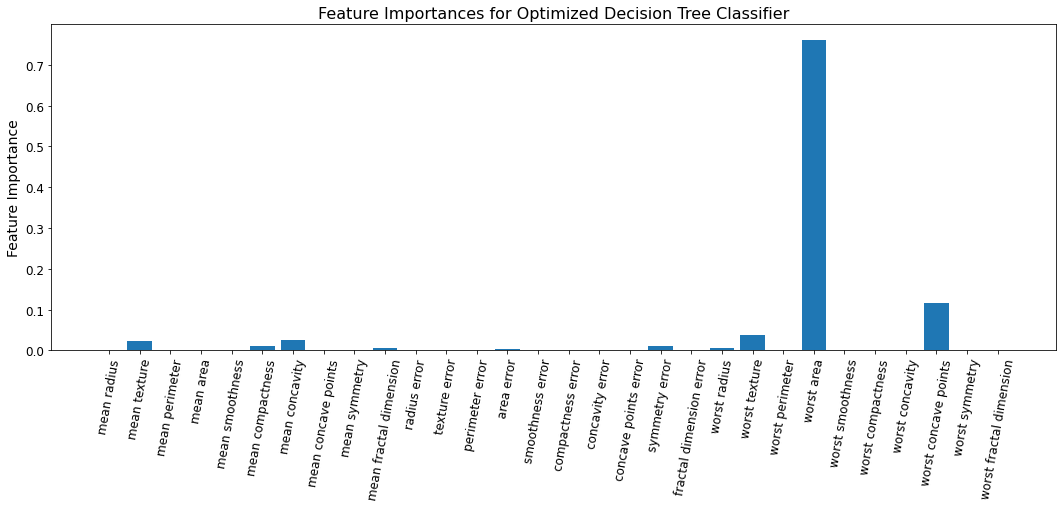

In [207]:
model=DecisionTreeClassifier(random_state=3,max_depth=best_depth,max_features=best_feature)
model.fit(X_train,y_train)
feature_importances=model.feature_importances_

plt.figure(figsize=(18,6))
plt.bar(range(len(feature_importances)),feature_importances)
plt.xticks(range(len(feature_importances)),dataset.feature_names,rotation=80)
plt.ylabel("Feature Importance")
plt.title("Feature Importances for Optimized Decision Tree Classifier")
plt.show()

The physician who needs to diagnose whether the sample is malignant or not needs to firstly look at the area where the lump is, secondly at its concave points and thirdly at its texture.

### (b)

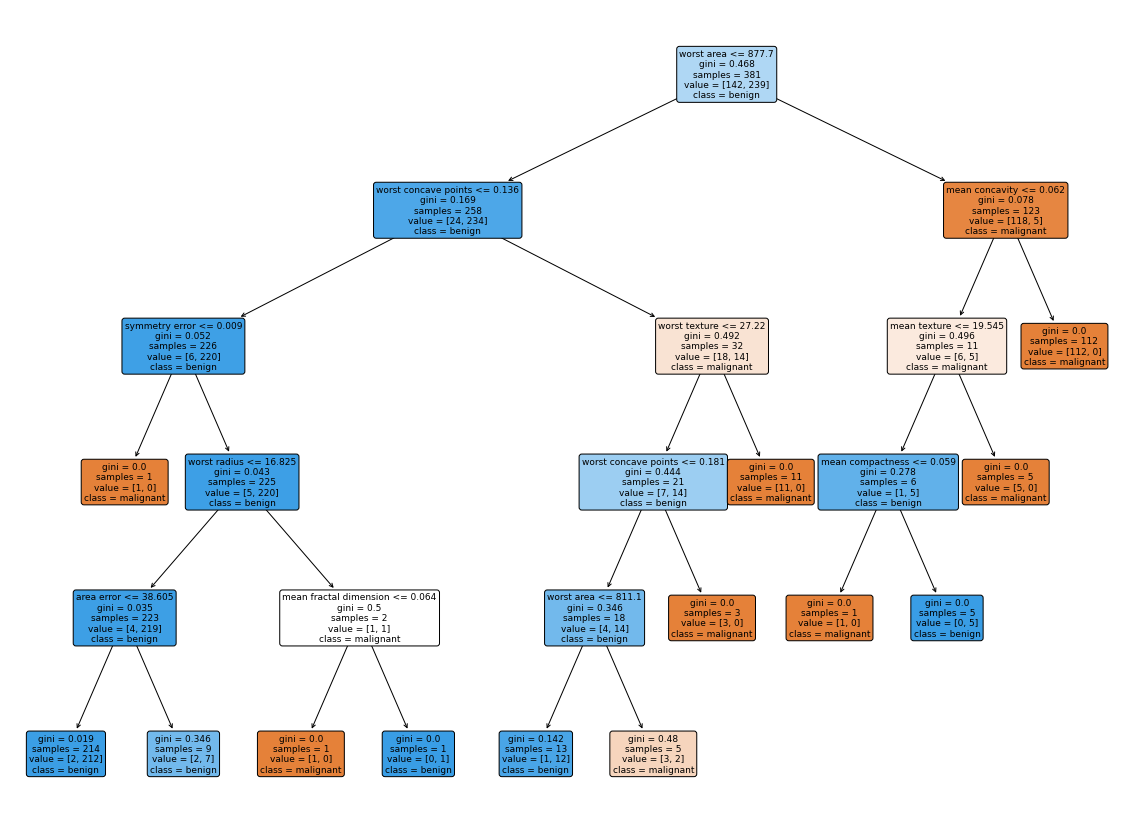

In [209]:
plt.figure(figsize=(20,15))
plot_tree(model,feature_names=dataset.feature_names,class_names=['malignant','benign'],filled=True,rounded=True,fontsize=9)
plt.show()

The features closer to the root of the tree are the most important features, area, concave points and texture are closest to the root of the tree which further signifies how important these features are, since these were the most prominant features in the bar chart.